In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import *
import astropy
from astropy import constants as ac
#from astroquery.mast import Observations
import lightkurve as lk
import celerite
from celerite import terms
from scipy.optimize import minimize
from astropy.io import fits
from astropy.table import Table
from lightkurve import search_lightcurvefile
from lightkurve import search_targetpixelfile

Importing in a few flare stars from short cadence TESS data

In [2]:
from astroquery.mast import Observations
from astroquery.mast import Catalogs
from astropy.io import fits
from astropy.timeseries import TimeSeries
from astropy.utils.data import get_pkg_data_filename

In [3]:
#20 sec data star 31 2020 observations
s_20s = get_pkg_data_filename('/Users/lupitatovar/local_flares/TESS_Flare_Stars/tess2020238165205-s0029-0000000197829751_20s_aug.fits')

#2min data star 31, 2020 observations
s_2min = get_pkg_data_filename('/Users/lupitatovar/local_flares/TESS_Flare_Stars/tess2020238165205-s0029-0000000197829751-0193_2min_aug.fits')

#10 min, 2020 observations
s_10min = get_pkg_data_filename('/Users/lupitatovar/local_flares/TESS_Flare_Stars/hlsp_tess_0000000197829751-s0029_10min.fits')

#30min, 2018 observations
s_30min = get_pkg_data_filename('/Users/lupitatovar/local_flares/TESS_Flare_Stars/hlsp_tess-spoc_tess_phot_0000000197829751_30min_aug18.fits')

#star 33 20 sec data
fs3 = get_pkg_data_filename('/Users/lupitatovar/local_flares/TESS_Flare_Stars/tess2020351194500-s0033-0000000272232401-0203-a_fast-lc.fits')

In [4]:
lc_20s = TimeSeries.read(s_20s,format='tess.fits')
lc_2min = TimeSeries.read(s_2min,format='tess.fits')
lc_10min = TimeSeries.read(s_10min,format='tess.fits')
lc_30min = TimeSeries.read(s_30min,format='tess.fits')

/Users/lupitatovar/anaconda3/lib/python3.7/site-packages/astropy/timeseries/io/kepler.py:77: UserWarning: Ignoring 4080 rows with NaN times
  warnings.warn('Ignoring {} rows with NaN times'.format(np.sum(nans)))
/Users/lupitatovar/anaconda3/lib/python3.7/site-packages/astropy/timeseries/io/kepler.py:77: UserWarning: Ignoring 681 rows with NaN times
  warnings.warn('Ignoring {} rows with NaN times'.format(np.sum(nans)))
/Users/lupitatovar/anaconda3/lib/python3.7/site-packages/astropy/timeseries/io/kepler.py:77: UserWarning: Ignoring 137 rows with NaN times
  warnings.warn('Ignoring {} rows with NaN times'.format(np.sum(nans)))
/Users/lupitatovar/anaconda3/lib/python3.7/site-packages/astropy/timeseries/io/kepler.py:77: UserWarning: Ignoring 70 rows with NaN times
  warnings.warn('Ignoring {} rows with NaN times'.format(np.sum(nans)))


In [5]:
#lc1['time', 'sap_flux']
lc_20s.time.btjd

array([2088.23472666, 2088.23495814, 2088.23518963, ..., 2114.43581739,
       2114.43604888, 2114.43628036])

Text(0, 0.5, 'SAP Flux (e-/s)')

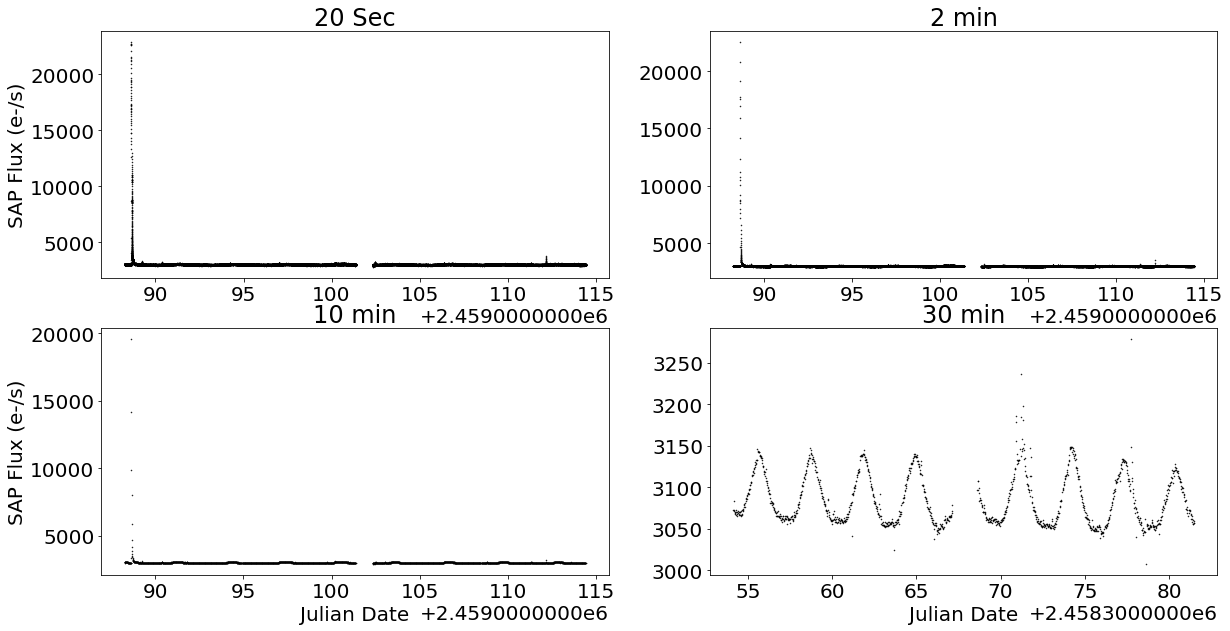

In [6]:
plt.rcParams['font.size'] = 20
fig, axs = plt.subplots(2,2, figsize=(20, 10), facecolor='w', edgecolor='k')

axs[0,0].plot(lc_20s.time.jd, lc_20s['sap_flux'], 'k.', markersize=1)
axs[0,0].set_title('20 Sec')
axs[0,1].plot(lc_2min.time.jd, lc_2min['sap_flux'], 'k.', markersize=1)
axs[0,1].set_title('2 min')

axs[1,0].plot(lc_10min.time.jd, lc_10min['sap_flux'], 'k.', markersize=1)
axs[1,0].set_title('10 min')
axs[1,1].plot(lc_30min.time.jd, lc_30min['sap_flux'], 'k.', markersize=1)
axs[1,1].set_title('30 min')


axs[1,1].set_xlabel('Julian Date')
axs[1,0].set_xlabel('Julian Date')
axs[0,0].set_ylabel('SAP Flux (e-/s)')
axs[1,0].set_ylabel('SAP Flux (e-/s)')

(2088.5, 2089.0)

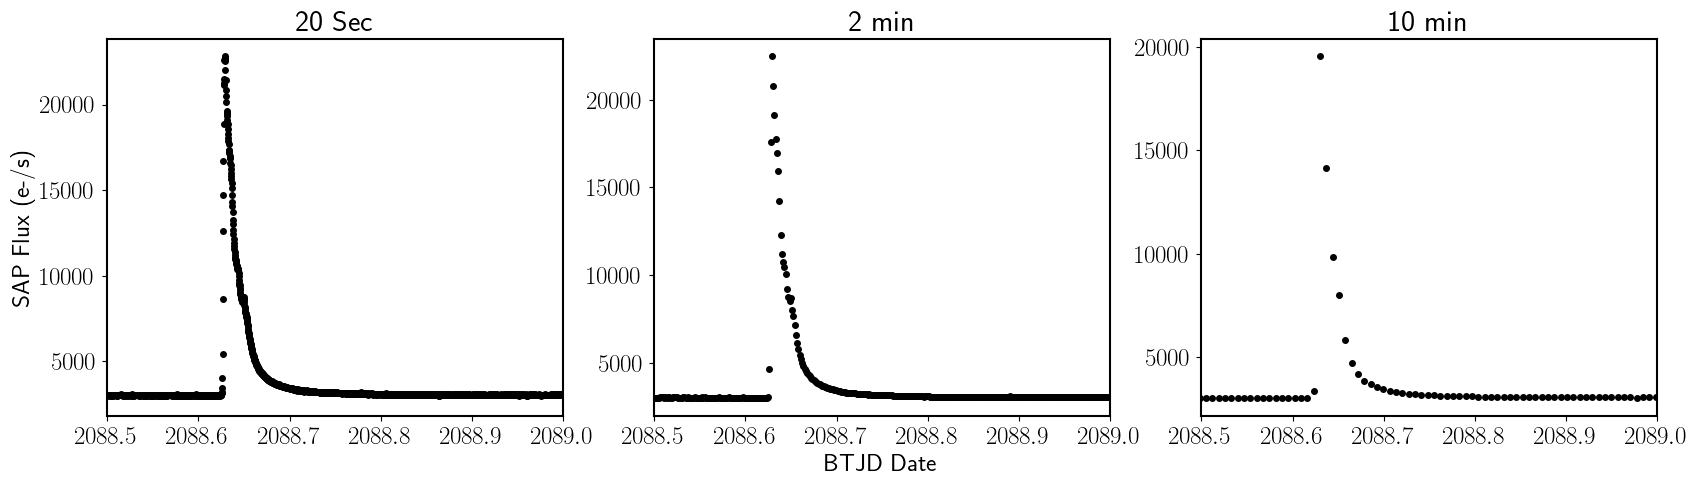

In [115]:
plt.rcParams['font.size'] = 18
fig, axs = plt.subplots(1,3, figsize=(20, 5), facecolor='w', edgecolor='k')

axs[0].plot(lc_20s.time.btjd, lc_20s['sap_flux'], 'k.', markersize=8)
axs[0].set_title('20 Sec')
axs[1].plot(lc_2min.time.btjd, lc_2min['sap_flux'], 'k.', markersize=8)
axs[1].set_title('2 min')

axs[2].plot(lc_10min.time.btjd, lc_10min['sap_flux'], 'k.', markersize=8)
axs[2].set_title('10 min')



axs[1].set_xlabel('BTJD Date')

axs[0].set_ylabel('SAP Flux (e-/s)')
axs[0].set_xlim(2088.5,2089.0)
axs[1].set_xlim(2088.5,2089.0)
axs[2].set_xlim(2088.5,2089.0)

(2700.0, 4000.0)

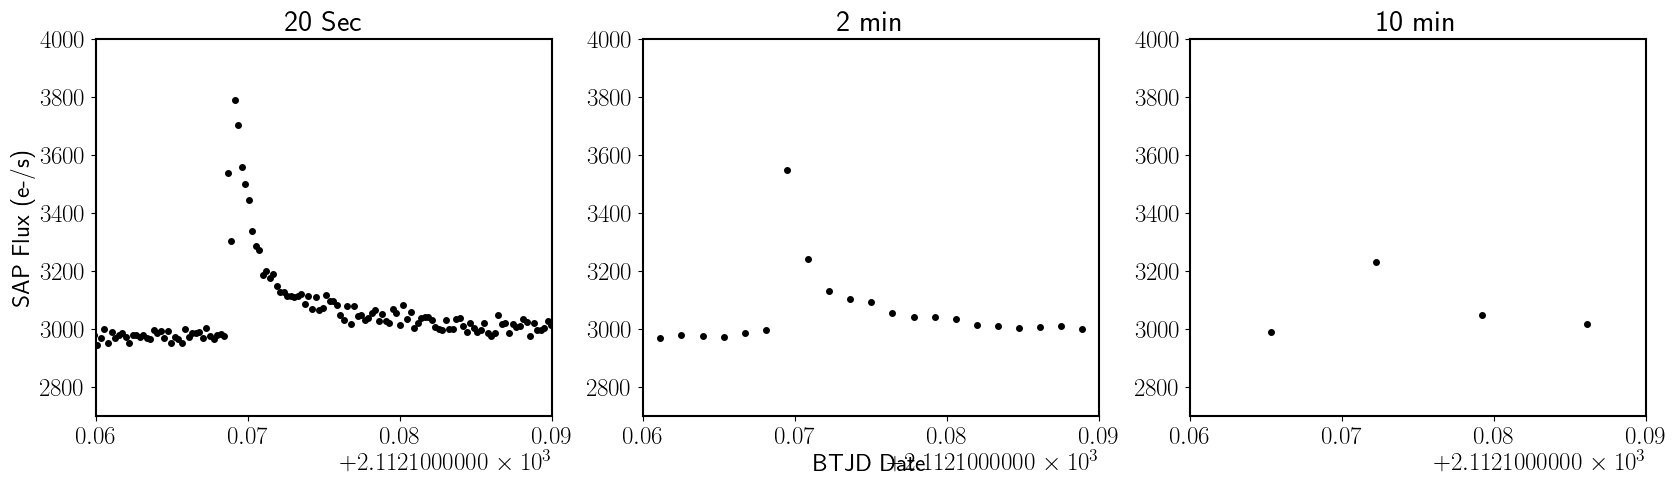

In [114]:
plt.rcParams['font.size'] = 18
fig, axs = plt.subplots(1,3, figsize=(20, 5), facecolor='w', edgecolor='k')

axs[0].plot(lc_20s.time.btjd, lc_20s['sap_flux'], 'k.', markersize=8)
axs[0].set_title('20 Sec')
axs[1].plot(lc_2min.time.btjd, lc_2min['sap_flux'], 'k.', markersize=8)
axs[1].set_title('2 min')

axs[2].plot(lc_10min.time.btjd, lc_10min['sap_flux'], 'k.', markersize=8)
axs[2].set_title('10 min')



axs[1].set_xlabel('BTJD Date')

axs[0].set_ylabel('SAP Flux (e-/s)')
axs[0].set_xlim(2112.16,2112.19)
axs[0].set_ylim(2700,4000)
axs[1].set_xlim(2112.16,2112.19)
axs[1].set_ylim(2700,4000)
#axs[1].set_xlim(2088.5,2089.0)
axs[2].set_xlim(2112.16,2112.19)
axs[2].set_ylim(2700,4000)

In [8]:
from scipy.stats import binned_statistic

def aflare1(t, tpeak, fwhm, ampl, upsample=False, uptime=10):
    '''
    The Analytic Flare Model evaluated for a single-peak (classical).
    Reference Davenport et al. (2014) http://arxiv.org/abs/1411.3723
    Use this function for fitting classical flares with most curve_fit
    tools.
    Note: this model assumes the flux before the flare is zero centered
    Parameters
    ----------
    t : 1-d array
        The time array to evaluate the flare over
    tpeak : float
        The time of the flare peak
    fwhm : float
        The "Full Width at Half Maximum", timescale of the flare
    ampl : float
        The amplitude of the flare
    upsample : bool
        If True up-sample the model flare to ensure more precise energies.
    uptime : float
        How many times to up-sample the data (Default is 10)
    Returns
    -------
    flare : 1-d array
        The flux of the flare model evaluated at each time
    '''
    _fr = [1.00000, 1.94053, -0.175084, -2.24588, -1.12498]
    _fd = [0.689008, -1.60053, 0.302963, -0.278318]

    if upsample:
        dt = np.nanmedian(np.diff(t))
        timeup = np.linspace(min(t)-dt, max(t)+dt, t.size * uptime)

        flareup = np.piecewise(timeup, [(timeup<= tpeak) * (timeup-tpeak)/fwhm > -1.,
                                        (timeup > tpeak)],
                                    [lambda x: (_fr[0]+                       # 0th order
                                                _fr[1]*((x-tpeak)/fwhm)+      # 1st order
                                                _fr[2]*((x-tpeak)/fwhm)**2.+  # 2nd order
                                                _fr[3]*((x-tpeak)/fwhm)**3.+  # 3rd order
                                                _fr[4]*((x-tpeak)/fwhm)**4. ),# 4th order
                                     lambda x: (_fd[0]*np.exp( ((x-tpeak)/fwhm)*_fd[1] ) +
                                                _fd[2]*np.exp( ((x-tpeak)/fwhm)*_fd[3] ))]
                                    ) * np.abs(ampl) # amplitude

        # and now downsample back to the original time...
        ## this way might be better, but makes assumption of uniform time bins
        # flare = np.nanmean(flareup.reshape(-1, uptime), axis=1)

        ## This way does linear interp. back to any input time grid
        # flare = np.interp(t, timeup, flareup)

        ## this was uses "binned statistic"
        downbins = np.concatenate((t-dt/2.,[max(t)+dt/2.]))
        flare,_,_ = binned_statistic(timeup, flareup, statistic='mean',
                                 bins=downbins)

    else:
        flare = np.piecewise(t, [(t<= tpeak) * (t-tpeak)/fwhm > -1.,
                                 (t > tpeak)],
                                [lambda x: (_fr[0]+                       # 0th order
                                            _fr[1]*((x-tpeak)/fwhm)+      # 1st order
                                            _fr[2]*((x-tpeak)/fwhm)**2.+  # 2nd order
                                            _fr[3]*((x-tpeak)/fwhm)**3.+  # 3rd order
                                            _fr[4]*((x-tpeak)/fwhm)**4. ),# 4th order
                                 lambda x: (_fd[0]*np.exp( ((x-tpeak)/fwhm)*_fd[1] ) +
                                            _fd[2]*np.exp( ((x-tpeak)/fwhm)*_fd[3] ))]
                                ) * np.abs(ampl) # amplitude

    return flare

In [9]:
from scipy import special
def flare_model_v2(t,tpeak, fwhm, ampl, upsample=True, uptime=10):

    t_new = (t-tpeak)/fwhm +2


    #Values were fit & calculated using MCMC 256 walkers and 30000 steps

    A,B,C,D1,D2,f1 = A,B,C,D1,D2,f1 = [3.714766073353358,1.749665640328046,0.1979131664366433,0.17912992867648345,1.3591276162814818,0.19600454472080225]
    #[3.46452433, 1.74147744, 0.21642749, 0.22529023, 1.39565111, 0.21624606]

    z1 = ((2*B + (C**2 *D1))/(2*C))
    z2 = ((2*B + C**2 *D2)/(2*C))
    f2 = 1-f1
    
    if upsample:
        dt = np.nanmedian(np.diff(np.abs(t_new)))
        timeup = np.linspace(min(t_new)-dt, max(t_new)+dt, t_new.size * uptime)

        flareup = (1/2) * np.sqrt(np.pi) * A * C * ((f1 * np.exp((D1*(B-timeup)) + ((C**2 * D1**2)/4))*(special.erf(z1) - special.erf(z1 - (timeup/C))))
                                                 + (f2 * np.exp((D2*(B-timeup)) + ((C**2 * D2**2)/4))*(special.erf(z2) - special.erf(z2 - (timeup/C)))))

        # and now downsample back to the original time...
        ## this way might be better, but makes assumption of uniform time bins
        # flare = np.nanmean(flareup.reshape(-1, uptime), axis=1)

        ## This way does linear interp. back to any input time grid
        # flare = np.interp(t, timeup, flareup)

        ## this was uses "binned statistic"
        downbins = np.concatenate((t_new-dt/2.,[max(t_new)+dt/2.]))
        flare,_,_ = binned_statistic(timeup, flareup, statistic='mean',bins=downbins)
    else:
        flare = (1/2) * np.sqrt(np.pi) * A * C * ((f1 * np.exp((D1*(B-t_new)) + ((C**2 * D1**2)/4))*(special.erf(z1) - special.erf(z1 - (t_new/C))))
                                             + (f2 * np.exp((D2*(B-t_new)) + ((C**2 * D2**2)/4))*(special.erf(z2) - special.erf(z2 - (t_new/C)))))
        
    erf_bound = 0.5*(special.erf((t_new-0.2)*100) + 1)
    
    return flare * ampl * erf_bound 

In [10]:
from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 20
#rcParams["figure.figsize"] = [8, 5]
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Computer Modern Sans Serif"]
rcParams["text.usetex"] = True

Text(0, 0.5, 'SAP Flux')

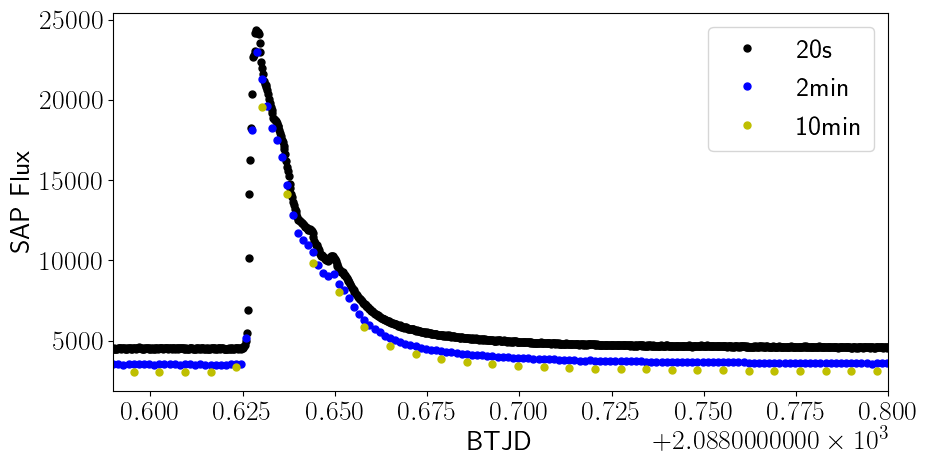

In [11]:
plt.figure(figsize=(10,5))
plt.plot(lc_20s.time.btjd, lc_20s['sap_flux'].value+1500, 'k.', markersize=10, label = '20s')
plt.plot(lc_2min.time.btjd, lc_2min['sap_flux'].value+500, 'b.', markersize=10, label = '2min')
plt.plot(lc_10min.time.btjd, lc_10min['sap_flux'], 'y.',markersize=10, label = '10min')
plt.xlim(2088.59,2088.8)
plt.legend()
plt.xlabel('BTJD')
plt.ylabel('SAP Flux')

## Example Button/slider 

In [12]:
from matplotlib.widgets import Slider, Button

In [16]:
lc_20s['sap_flux']

<Quantity [      nan,       nan,       nan, ..., 2955.3396, 2978.6287,
           2976.689 ] electron / s>

## Fitting the Flare

In [218]:
lc1median = (lc_20s['sap_flux']/np.nanmedian(lc_20s['sap_flux']))-1
lc2median = (lc_2min['sap_flux']/np.nanmedian(lc_2min['sap_flux']))-1
lc3median = (lc_10min['sap_flux']/np.nanmedian(lc_10min['sap_flux']))-1
lc4median = (lc_30min['sap_flux']/np.nanmedian(lc_30min['sap_flux']))-1

In [219]:
print(lc1median)

[        nan         nan         nan ... -0.01336825 -0.00559324
 -0.00624079]


Text(0, 0.5, 'Relative Flux')

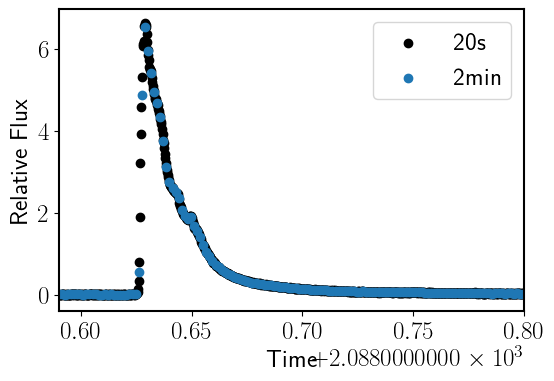

In [220]:
plt.scatter(lc_20s.time.btjd,lc1median,color='black', label='20s',lw=1)
plt.scatter(lc_2min.time.btjd,lc2median,color='C0',label='2min',lw=1)
plt.xlim(2088.59,2088.8)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Relative Flux')

In [221]:
mask = ~(np.isnan(lc_20s.time.btjd) | np.isnan(lc1median))
print(mask)

[False False False ...  True  True  True]


(-0.05, 0.3)

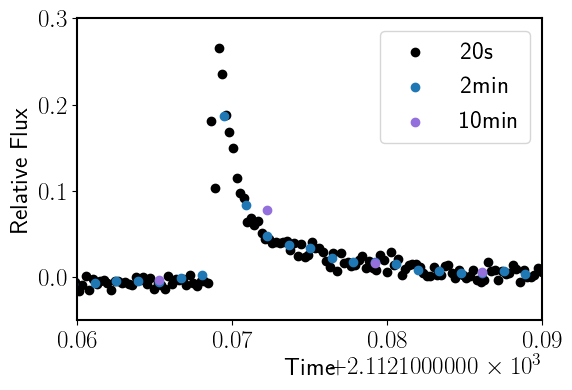

In [222]:

plt.scatter(lc_20s.time.btjd,lc1median,color='black', label='20s',lw=1)
plt.scatter(lc_2min.time.btjd,lc2median,color='C0',label='2min',lw=1)
plt.scatter(lc_10min.time.btjd,lc3median,color='mediumpurple',label='10min',lw=1)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Relative Flux')
plt.xlim(2112.16,2112.19)
plt.ylim(-0.05,0.3)

In [223]:
xmin = 0.6+2.088e3
xmin2 = 0.058+2.1121e3
xmax = 0.7+2.088e3
xmax2 = 0.09+2.1121e3
x_mask = np.where((lc_20s.time.btjd[mask] > xmin) & (lc_20s.time.btjd[mask] < xmax))[0]
x_mask2 = np.where((lc_20s.time.btjd[mask] > xmin2) & (lc_20s.time.btjd[mask] < xmax2))[0]
print(len(x_mask))
print(len(x_mask2))
print(len(lc_20s.time.btjd))

432
139
109110


In [224]:
print(len(lc_20s.time.btjd[mask][x_mask]))
print(len(lc1median[mask][x_mask]))

432
432


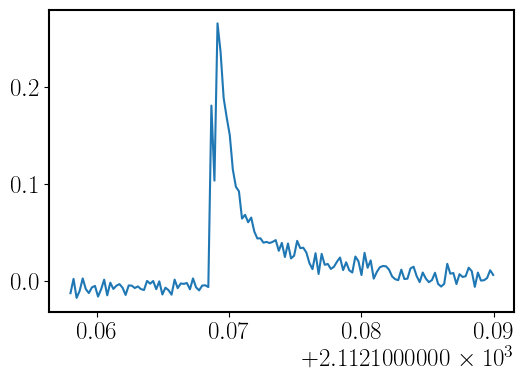

In [225]:
plt.plot(lc_20s.time.btjd[mask][x_mask2],lc1median[mask][x_mask2])

In [226]:
#np.polyfit(lc1.time.jd[mask][x_mask],lc1median[mask][x_mask], 2)

Fitting new analytical model

In [227]:
from scipy.optimize import curve_fit
xfit = lc_20s.time.btjd[mask][x_mask] - 2.088e+03 # approx t_peak
yfit = lc1median[mask][x_mask]

In [228]:
xfit2 = lc_20s.time.btjd[mask][x_mask2] - 2.1121e3 # approx t_peak
yfit2 = lc1median[mask][x_mask2]

In [229]:
print(len(xfit))
print(len(yfit))

432
432


In [294]:
#init_vals= [2.45916777e+06, 1.72434046e-02, 6.99969939e-01]
#init_vals =[2.45916714e+06, 0.4,1.4]
#bounds=((xmin,2e-02,6e-01),(xmax,1,1.5))

#init_vals= [2.45916779e+06, .65e-02, 1.389] #These look a lot better!
#init_vals =[-0.005, .7e-02, 1.38] #Jim's vals
init_vals1=[.629, .007,  6.5]
popt, pcov = curve_fit(flare_model_v2, xfit,yfit, p0=init_vals1,maxfev=100000)

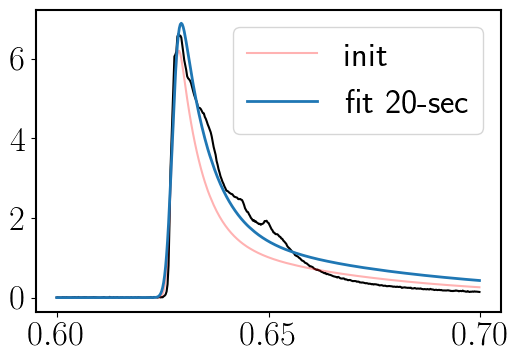

In [295]:
plt.plot(xfit,yfit,color='black')
plt.plot(xfit, flare_model_v2(xfit, *init_vals1),color='red', label='init', alpha=0.3)
plt.plot(xfit, flare_model_v2(xfit, *popt),color='C0', label='fit 20-sec', lw=2)
plt.legend()
#plt.xlim(-0.05,0.1)

(0.065, 0.08)

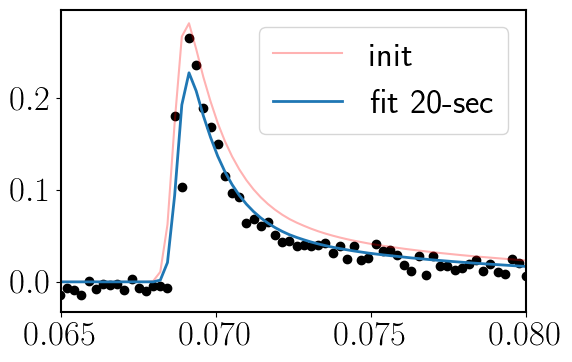

In [272]:
init_vals=[.0691, .0017,  0.3]
popt, pcov = curve_fit(flare_model_v2, xfit2,yfit2, p0=init_vals,maxfev=100000)
plt.scatter(xfit2,yfit2,color='black')
plt.plot(xfit2, flare_model_v2(xfit2, *init_vals),color='red', label='init', alpha=0.3)
plt.plot(xfit2, flare_model_v2(xfit2, *popt),color='C0', label='fit 20-sec', lw=2)
plt.legend()
plt.xlim(0.065,0.08)

In [233]:
print(popt)
print(pcov)

[0.06916121 0.00154946 0.24060846]
[[ 7.35286833e-10  1.42513459e-09 -1.11805550e-07]
 [ 1.42513459e-09  9.04534494e-09 -7.04406231e-07]
 [-1.11805550e-07 -7.04406231e-07  9.08400876e-05]]


Fitting Jim's 2014 Model

In [260]:

init_vals2 =[.629, .007,  6.5] 
j_popt, j_pcov = curve_fit(aflare1, xfit,yfit, p0=init_vals2,maxfev=100000)#,bounds=bounds)
print(j_popt)
print(j_pcov)

[0.62976941 0.0085533  7.7446033 ]
[[ 2.80363033e-09  2.81412122e-09 -1.24306150e-06]
 [ 2.81412122e-09  3.82430184e-08 -1.71155474e-05]
 [-1.24306150e-06 -1.71155474e-05  1.34017383e-02]]


fitting v2 flare model

Text(0.5, 1.0, '20 Second TESS Data')

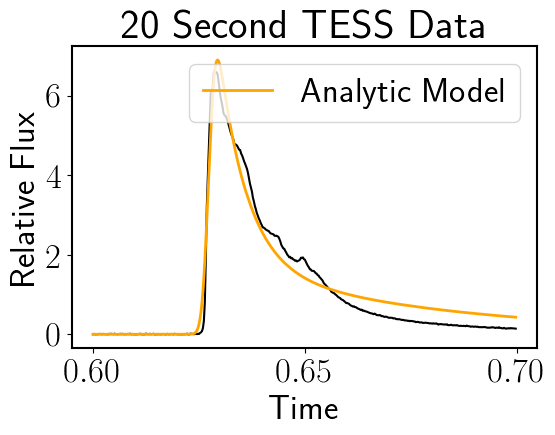

In [261]:
plt.plot(xfit,yfit,color='black')
#plt.plot(xfit, aflare1(xfit, *init_vals2),color='red', label='init', alpha=0.3)
#plt.plot(xfit, aflare1(xfit, *j_popt),color='C0', label='Jim Model', lw=2)
#plt.plot(xfit, flare_model(xfit, *popt),color='purple', label='Model V1', lw=2)
plt.plot(xfit, flare_model_v2(xfit,*popt),color='orange',label='Analytic Model',lw=2)
plt.legend()
#plt.xlim(-0.03,0.05)
plt.xlabel('Time')
plt.ylabel('Relative Flux')
plt.title('20 Second TESS Data')

### If the 20s data were sampled at 2min what would the fit look like?


In [296]:
mask2 = ~(np.isnan(lc_2min.time.btjd) | np.isnan(lc2median))
x_mask2 = np.where((lc_2min.time.btjd[mask2] > xmin) & (lc_2min.time.btjd[mask2] < xmax))[0]
x_mask2_2min = np.where((lc_2min.time.btjd[mask2] > xmin2) & (lc_2min.time.btjd[mask2] < xmax2))[0]
print(len(x_mask2_2min))
print(len(lc_2min.time.btjd))

23
18183


In [297]:
xfit_2min = lc_2min.time.btjd[mask2][x_mask2]  - 2.088e+03 # approx t_peak
yfit_2min = lc2median[mask2][x_mask2]

xfit2_2min = lc_2min.time.btjd[mask2][x_mask2_2min] - 2.1121e3 # approx t_peak
yfit2_2min = lc2median[mask2][x_mask2_2min]

In [298]:
p01 =[.63, .001,  8.5] 
popt2, pcov2 = curve_fit(flare_model_v2, xfit_2min,yfit_2min, p0=p01,maxfev=1000000)
print(popt2)
print(pcov2)

[0.62965266 0.00891886 7.22618389]
[[ 1.51826916e-08  3.26501515e-08 -1.27128455e-05]
 [ 3.26501515e-08  2.07499983e-07 -8.23559304e-05]
 [-1.27128455e-05 -8.23559304e-05  5.30388803e-02]]


Text(0.5, 1.0, '2min TESS Data')

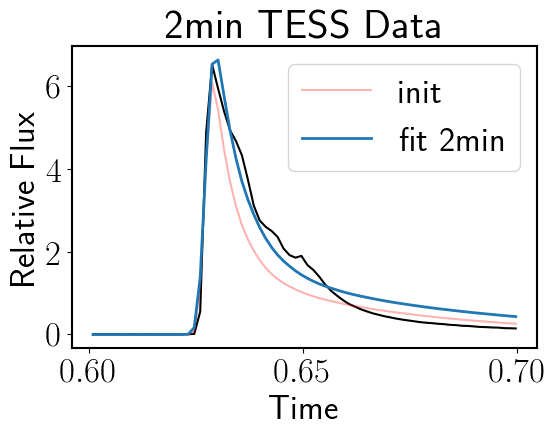

In [299]:
plt.plot(xfit_2min,yfit_2min,color='black')
plt.plot(xfit_2min, flare_model_v2(xfit_2min, *init_vals1),color='red', label='init', alpha=0.3)
plt.plot(xfit_2min, flare_model_v2(xfit_2min, *popt2),color='C0', label='fit 2min', lw=2)
plt.legend()
#plt.xlim(-0.05,0.1)
plt.xlabel('Time')
plt.ylabel('Relative Flux')
plt.title('2min TESS Data')

(0.065, 0.08)

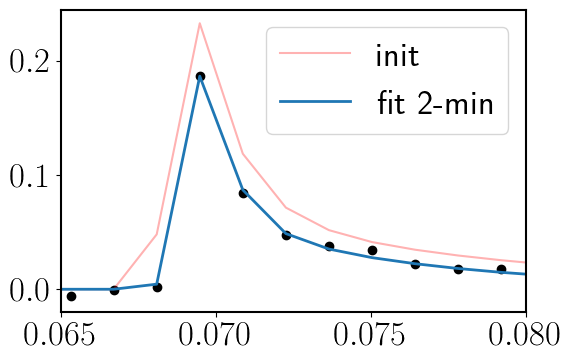

In [273]:
init_vals=[.0691, .0017,  0.3]
popt2, pcov2 = curve_fit(flare_model_v2, xfit2_2min,yfit2_2min, p0=init_vals,maxfev=100000)
plt.scatter(xfit2_2min,yfit2_2min,color='black')
plt.plot(xfit2_2min, flare_model_v2(xfit2_2min, *init_vals),color='red', label='init', alpha=0.3)
plt.plot(xfit2_2min, flare_model_v2(xfit2_2min, *popt2),color='C0', label='fit 2-min', lw=2)
plt.legend()
plt.xlim(0.065,0.08)

Fitting 2min data w/Jim's model

In [264]:
init_vals2min =[.629, .007,  6.3]
j2_popt, j2_pcov = curve_fit(aflare1, xfit_2min,yfit_2min, p0=init_vals2min,maxfev=100000)#,bounds=bounds)
print(j2_popt)
print(j2_pcov)

[0.6296842  0.00840243 7.85258762]
[[ 1.64075253e-08  2.04225409e-08 -1.06830234e-05]
 [ 2.04225409e-08  2.24023635e-07 -1.06771036e-04]
 [-1.06830234e-05 -1.06771036e-04  8.46355481e-02]]


Text(0.5, 1.0, '2 min TESS Data')

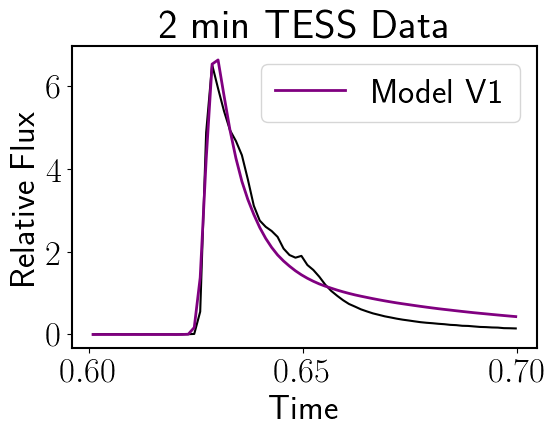

In [265]:
plt.plot(xfit_2min,yfit_2min,color='black')
#plt.plot(xfit_2min, flare_model(xfit_2min, *init_vals),color='red', label='init', alpha=0.3)


#plt.plot(xfit_2min, aflare1(xfit_2min, *j2_popt),color='C0', label='Jim Model', lw=2)
plt.plot(xfit_2min, flare_model_v2(xfit_2min, *popt2),color='purple', label='Model V1', lw=2)
plt.legend()
#plt.xlim(-0.03,0.05)
plt.xlabel('Time')
plt.ylabel('Relative Flux')
plt.title('2 min TESS Data')

### 10min data sampling

In [243]:
mask3 = ~(np.isnan(lc_10min.time.btjd) | np.isnan(lc3median))
x_mask3 = np.where((lc_10min.time.btjd[mask3] > xmin) & (lc_10min.time.btjd[mask3] < xmax))[0]
x_mask3_10min = np.where((lc_10min.time.btjd[mask3] > xmin2) & (lc_10min.time.btjd[mask3] < xmax2))[0]
print(len(x_mask3))
print(len(lc_10min.time.btjd))

15
3635


In [300]:
xfit_10min = lc_10min.time.btjd[mask3][x_mask3]  - 2.088e+03 # approx t_peak
yfit_10min = lc3median[mask3][x_mask3]


xfit2_10min = lc_10min.time.btjd[mask3][x_mask3_10min] - 2.1121e3 # approx t_peak
yfit2_10min = lc3median[mask3][x_mask3_10min]


In [301]:
p01 =[.629, .007,  6.4] 
popt3, pcov3 = curve_fit(flare_model_v2, xfit_10min,yfit_10min, p0=p01,maxfev=100000)
print(popt3)
print(pcov3)

[6.31035293e-01 3.84086129e-03 1.34986669e+01]
[[ 4.34163264e-08 -6.69150848e-08  1.86136549e-04]
 [-6.69150848e-08  2.38015268e-07 -6.15676605e-04]
 [ 1.86136549e-04 -6.15676605e-04  1.69169109e+00]]


Text(0.5, 1.0, '10min TESS Data')

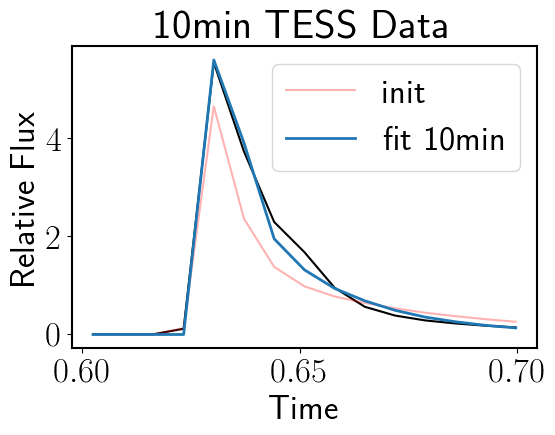

In [302]:
plt.plot(xfit_10min,yfit_10min,color='black')
plt.plot(xfit_10min, flare_model_v2(xfit_10min, *init_vals1),color='red', label='init', alpha=0.3)
plt.plot(xfit_10min, flare_model_v2(xfit_10min, *popt3),color='C0', label='fit 10min', lw=2)
plt.legend()
#plt.xlim(-0.05,0.1)
plt.xlabel('Time')
plt.ylabel('Relative Flux')
plt.title('10min TESS Data')

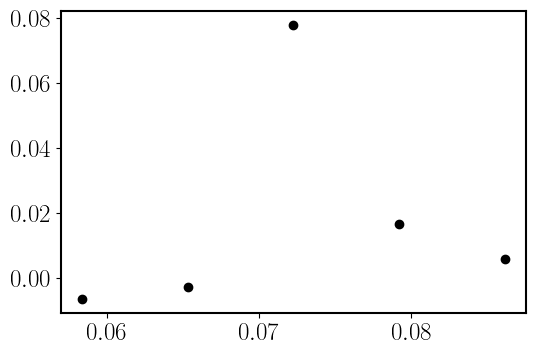

In [247]:
plt.scatter(xfit2_10min,yfit2_10min,color='black')

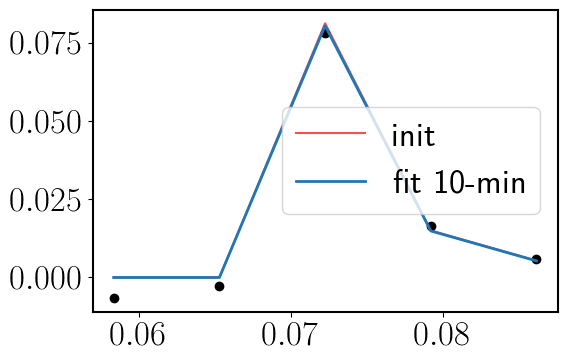

In [274]:
init_vals=[.07, .001,  0.4]
popt3, pcov3 = curve_fit(flare_model_v2, xfit2_10min,yfit2_10min, p0=init_vals,maxfev=100000)
plt.scatter(xfit2_10min,yfit2_10min,color='black')
plt.plot(xfit2_10min, flare_model_v2(xfit2_10min, *init_vals),color='red', label='init', alpha=0.7)
plt.plot(xfit2_10min, flare_model_v2(xfit2_10min, *popt3),color='C0', label='fit 10-min', lw=2)
plt.legend()
#plt.xlim(0.065,0.08)

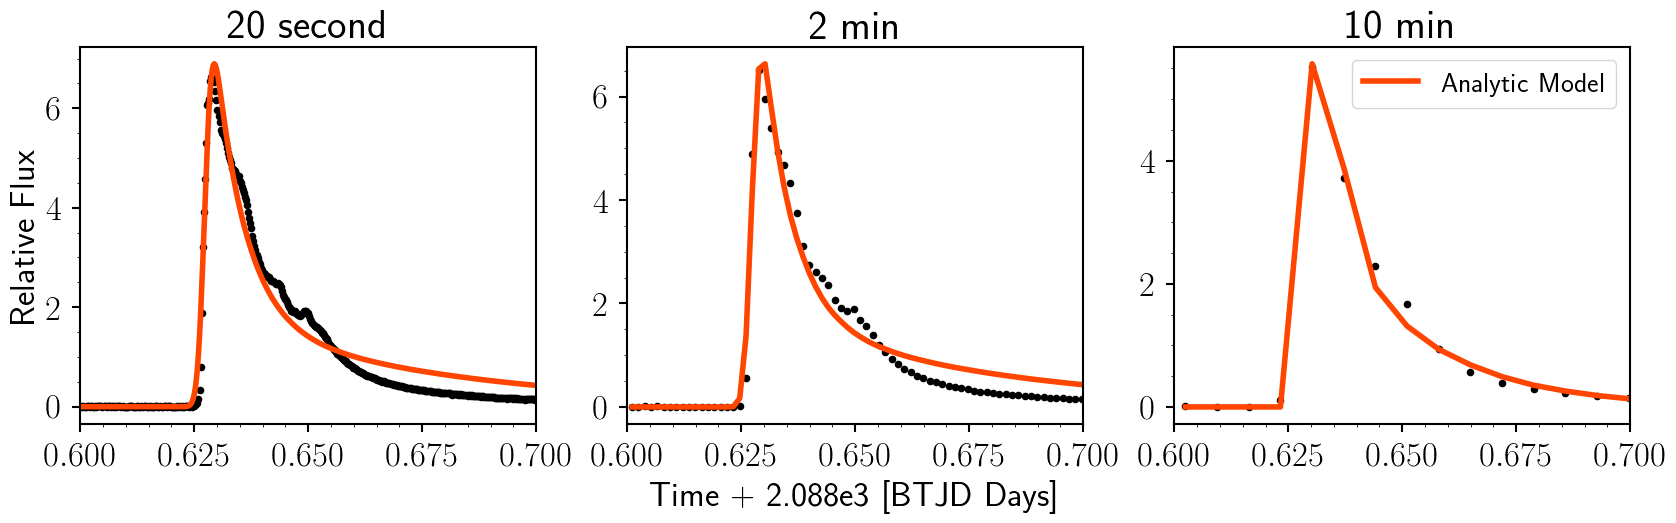

In [304]:
fig, axs = plt.subplots(1,3, figsize=(20, 5), facecolor='w', edgecolor='k')
plt.rcParams['axes.linewidth']=1.5
axs[0].tick_params(direction='out',width=1.5,length=6,pad=7)
axs[1].tick_params(direction='out',width=1.5,length=6,pad=7)
axs[2].tick_params(direction='out',width=1.5,length=6,pad=7)
axs[0].minorticks_on()
axs[1].minorticks_on()
axs[2].minorticks_on()
axs[0].scatter(xfit,yfit,color='black',s=20)
#plt.plot(xfit, aflare1(xfit, *init_vals2),color='red', label='init', alpha=0.3)
#axs[0].plot(xfit, aflare1(xfit, *j_popt),color='C0', label='Jim Model', lw=4)
axs[0].plot(xfit, flare_model_v2(xfit, *popt),color='orangered', lw=4)
#axs[0].plot(xfit, flare_model_v2(xfit,*popt_v2),color='orange',label='Model V2',lw=2)
#axs[0].legend()
axs[0].set_xlim(0.6,0.7)
#axs[0].set_xlabel('Time')
axs[0].set_ylabel('Relative Flux')
axs[0].set_title('20 second')


axs[1].scatter(xfit_2min,yfit_2min,color='black',s=20)
#plt.plot(xfit_2min, flare_model(xfit_2min, *init_vals),color='red', label='init', alpha=0.3)
#axs[1].plot(xfit_2min, aflare1(xfit_2min, *j2_popt),color='C0', label='2014 Model', lw=4)
axs[1].plot(xfit_2min, flare_model_v2(xfit_2min, *popt2),color='orangered', lw=4)
#axs[1].plot(xfit_2min, flare_model_v2(xfit_2min, *v2_popt),color='orange', label='Model V2', lw=2)


axs[2].scatter(xfit_10min,yfit_10min,color='black',s=20)
#plt.plot(xfit_2min, flare_model(xfit_2min, *init_vals),color='red', label='init', alpha=0.3)
#axs[1].plot(xfit_2min, aflare1(xfit_2min, *j2_popt),color='C0', label='2014 Model', lw=4)
axs[2].plot(xfit_10min, flare_model_v2(xfit_10min, *popt3),color='orangered',  lw=4, label='Analytic Model')

#axs[1].legend()
axs[2].legend(fontsize=20)
#axs[1].set_xlim(-0.02,0.02)
axs[1].set_xlabel('Time + 2.088e3  [BTJD Days]')
#axs[1].set_ylabel('Relative Flux')
axs[1].set_title('2 min')

axs[1].set_xlim(0.6,0.7)
axs[2].set_xlim(0.6,0.7)

axs[2].set_title('10 min')
#plt.savefig('/Users/lupitatovar/local_flares/paper_figs/tess_exs_orangred.png',bbox_inches='tight')

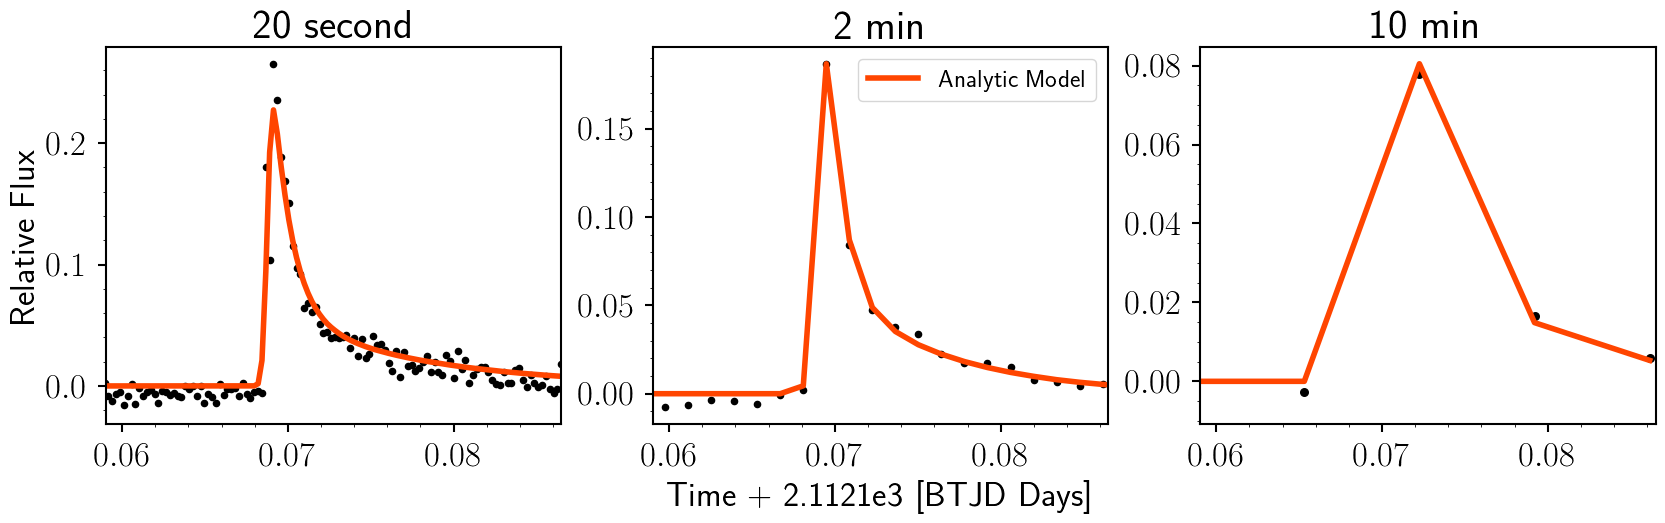

In [292]:
fig, axs = plt.subplots(1,3, figsize=(20, 5), facecolor='w', edgecolor='k')
plt.rcParams['axes.linewidth']=1.5
axs[0].tick_params(direction='out',width=1.5,length=6,pad=7)
axs[1].tick_params(direction='out',width=1.5,length=6,pad=7)
axs[2].tick_params(direction='out',width=1.5,length=6,pad=7)
axs[0].minorticks_on()
axs[1].minorticks_on()
axs[2].minorticks_on()
axs[0].scatter(xfit2,yfit2,color='black',s=20)
#plt.plot(xfit, aflare1(xfit, *init_vals2),color='red', label='init', alpha=0.3)
#axs[0].plot(xfit, aflare1(xfit, *j_popt),color='C0', label='Jim Model', lw=4)
axs[0].plot(xfit2, flare_model_v2(xfit2, *popt),color='orangered', lw=4)
#axs[0].plot(xfit, flare_model_v2(xfit,*popt_v2),color='orange',label='Model V2',lw=2)
#axs[0].legend()
#axs[0].set_xlim(0.6,0.72)
#axs[0].set_xlabel('Time')
axs[0].set_ylabel('Relative Flux')
axs[0].set_title('20 second')


axs[1].scatter(xfit2_2min,yfit2_2min,color='black',s=20)
#plt.plot(xfit_2min, flare_model(xfit_2min, *init_vals),color='red', label='init', alpha=0.3)
#axs[1].plot(xfit_2min, aflare1(xfit_2min, *j2_popt),color='C0', label='2014 Model', lw=4)
axs[1].plot(xfit2_2min, flare_model_v2(xfit2_2min, *popt2),color='orangered', lw=4, label='Analytic Model')
#axs[1].plot(xfit_2min, flare_model_v2(xfit_2min, *v2_popt),color='orange', label='Model V2', lw=2)

axs[2].plot(xfit2_10min, flare_model_v2(xfit2_10min, *popt3),color='orangered',  lw=4)
axs[2].scatter(xfit2_10min,yfit2_10min,color='black',s=30)
#plt.plot(xfit_2min, flare_model(xfit_2min, *init_vals),color='red', label='init', alpha=0.3)
#axs[1].plot(xfit_2min, aflare1(xfit_2min, *j2_popt),color='C0', label='2014 Model', lw=4)
#axs[2].plot(xfit2_10min, flare_model_v2(xfit2_10min, *popt3),color='mediumpurple',  lw=4)

#axs[1].legend()
axs[1].legend(fontsize=18)
#axs[1].set_xlim(-0.02,0.02)
axs[1].set_xlabel('Time + 2.1121e3  [BTJD Days]')
#axs[1].set_ylabel('Relative Flux')
axs[1].set_title('2 min')

axs[0].set_xlim(0.059,0.0865)
axs[1].set_xlim(0.059,0.0865)
axs[2].set_xlim(0.059,0.0865)

axs[2].set_title('10 min')
#plt.savefig('/Users/lupitatovar/local_flares/paper_figs/tess_exs2_orangered.png',bbox_inches='tight')

In [251]:
rcParams["savefig.dpi"] = 300
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 25
#rcParams["figure.figsize"] = [8, 4]
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ['Verdana']#["Computer Modern Sans Serif"]
rcParams["text.usetex"] = True

In [252]:
###Fitting with the tess_model values
def flare_model_tess(t,tpeak, fwhm, ampl, upsample=False, uptime=10):

    t_new = (t-tpeak)/fwhm +2


    #Values were fit & calculated using MCMC 256 walkers and 10000 steps

    #A,B,C,D1,D2,f1 = 2.28498875e+01,  3.66808382e+00, -3.07542717e-02,  2.26971471e-02, 8.70691332e-01,  3.52620946e-02
    A,B,C,D1,D2,f1= 3.4645243420325182, 1.7414774413655434, 0.21642749344585893, 0.22529022355253145, 1.3956510983250918,  0.21624605951503317
    #previous [3.46452433, 1.74147744, 0.21642749, 0.22529023, 1.39565111, 0.21624606] from Kepler model
    z1 = ((2*B + (C**2 *D1))/(2*C))
    z2 = ((2*B + C**2 *D2)/(2*C))
    f2 = 1-f1
    
    if upsample:
        dt = np.nanmedian(np.diff(np.abs(t_new)))
        timeup = np.linspace(min(t_new)-dt, max(t_new)+dt, t_new.size * uptime)

        flareup = (1/2) * np.sqrt(np.pi) * A * C * ((f1 * np.exp((D1*(B-timeup)) + ((C**2 * D1**2)/4))*(special.erf(z1) - special.erf(z1 - (timeup/C))))
                                                 + (f2 * np.exp((D2*(B-timeup)) + ((C**2 * D2**2)/4))*(special.erf(z2) - special.erf(z2 - (timeup/C)))))

        # and now downsample back to the original time...
        ## this way might be better, but makes assumption of uniform time bins
        # flare = np.nanmean(flareup.reshape(-1, uptime), axis=1)

        ## This way does linear interp. back to any input time grid
        # flare = np.interp(t, timeup, flareup)

        ## this was uses "binned statistic"
        downbins = np.concatenate((t_new-dt/2.,[max(t_new)+dt/2.]))
        flare,_,_ = binned_statistic(timeup, flareup, statistic='mean',bins=downbins)
    else:

        flare = (1/2) * np.sqrt(np.pi) * A * C * ((f1 * np.exp((D1*(B-t_new)) + ((C**2 * D1**2)/4))*(special.erf(z1) - special.erf(z1 - (t_new/C))))
                                                 + (f2 * np.exp((D2*(B-t_new)) + ((C**2 * D2**2)/4))*(special.erf(z2) - special.erf(z2 - (t_new/C)))))

    erf_bound = 0.5*(special.erf((t_new-0.2)*100) + 1)

    return flare * ampl * erf_bound
